Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec

## 1. Data Cleansing

### 1.1 Identifying Missing Values, Incorrect Datatypes & Inconsistent Values

In [2]:
missing_values = ["n/a", "na", "N.A.", "--"]
df = pd.read_csv('cardio_good_fitness.csv', na_values = missing_values)

In [3]:
df.head()

,Product,Branch,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,West,18.0,Male,14.0,Single,NaN,4.0,29562.0,112.0
1,TM195,East,19.0,Male,15.0,Single,2.0,3.0,31836.0,75.0
2,TM195,West,19.0,Female,14.0,P,4.0,3.0,30699.0,66.0
3,TM195,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TM195,West,19.0,Male,12.0,S,NaN,3.0,32973.0,85.0


In [4]:
#incorrect datatype for features such as age, education, usage, fitness, income, miles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
Product          183 non-null object
Branch           183 non-null object
Age              174 non-null float64
Gender           180 non-null object
Education        180 non-null float64
MaritalStatus    180 non-null object
Usage            172 non-null float64
Fitness          180 non-null float64
Income           180 non-null float64
Miles            180 non-null float64
dtypes: float64(6), object(4)
memory usage: 14.4+ KB


In [5]:
# Check for null values in each column
#almost all columns have null values except product and branch
df.isnull().any()

Product          False
Branch           False
Age               True
Gender            True
Education         True
MaritalStatus     True
Usage             True
Fitness           True
Income            True
Miles             True
dtype: bool

In [6]:
df.isnull().sum()

Product           0
Branch            0
Age               9
Gender            3
Education         3
MaritalStatus     3
Usage            11
Fitness           3
Income            3
Miles             3
dtype: int64

In [7]:
df[df.isna().any(axis=1)]

,Product,Branch,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,West,18.0,Male,14.0,Single,NaN,4.0,29562.0,112.0
3,TM195,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TM195,West,19.0,Male,12.0,S,NaN,3.0,32973.0,85.0
8,TM195,West,21.0,Male,13.0,Single,NaN,3.0,32973.0,85.0
51,TM195,East,NaN,Male,18.0,Partnered,3.0,3.0,68220.0,85.0
52,TM195,South,NaN,Female,14.0,Partnered,2.0,2.0,46617.0,38.0
53,TM195,North,NaN,Female,16.0,Partnered,4.0,3.0,50028.0,94.0
55,TM195,North,30.0,Male,14.0,Single,NaN,3.0,54576.0,85.0
97,TM498,East,24.0,Female,16.0,Single,NaN,3.0,50028.0,106.0
113,TM498,South,NaN,Female,14.0,Partnered,3.0,3.0,51165.0,95.0


In [8]:
#shows that martial status unique value is not consistent.
for col in df:
    print(col, df[col].unique())
    print()

Product ['TM195' 'TM498' 'TM798']

Branch ['West' 'East' 'South' 'North']

Age [18. 19. nan 20. 21. 22. 23. 24. 25. 26. 27. 28. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 43. 44. 46. 47. 50. 45. 48. 42.]

Gender ['Male' 'Female' nan]

Education [14. 15. nan 12. 13. 16. 18. 20. 21.]

MaritalStatus ['Single' 'P' nan 'S' 'Partnered']

Usage [nan  2.  4.  3.  5.  6.  7.]

Fitness [ 4.  3. nan  2.  1.  5.]

Income [ 29562.  31836.  30699.     nan  32973.  35247.  37521.  36384.  38658.
  40932.  34110.  39795.  42069.  44343.  45480.  46617.  48891.  53439.
  43206.  52302.  51165.  50028.  54576.  68220.  55713.  60261.  67083.
  56850.  59124.  61398.  57987.  64809.  47754.  65220.  62535.  48658.
  54781.  48556.  58516.  53536.  61006.  57271.  52291.  49801.  62251.
  64741.  70966.  75946.  74701.  69721.  83416.  88396.  90886.  92131.
  77191.  52290.  85906. 103336.  99601.  89641.  95866. 104581.  95508.]

Miles [112.  75.  66.  nan  85.  47. 141. 103.  94. 113.  38. 188.  

### 1.2 Handling Missing Values

In [9]:
#Each record should have at least half of the total daataset columns not null.
middleGround = len(df.columns) / 2
df.dropna(thresh=middleGround, inplace=True)

In [10]:
df.isnull().sum()

Product          0
Branch           0
Age              6
Gender           0
Education        0
MaritalStatus    0
Usage            8
Fitness          0
Income           0
Miles            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 182
Data columns (total 10 columns):
Product          180 non-null object
Branch           180 non-null object
Age              174 non-null float64
Gender           180 non-null object
Education        180 non-null float64
MaritalStatus    180 non-null object
Usage            172 non-null float64
Fitness          180 non-null float64
Income           180 non-null float64
Miles            180 non-null float64
dtypes: float64(6), object(4)
memory usage: 15.5+ KB


In [12]:
median = df['Age'].median()
df.Age.replace(np.nan, median, inplace=True)

In [13]:
df.Age.isnull().sum()

0

In [14]:
#replace with 0 because the customer may not use the product after purchasing.
df.Usage.replace(np.nan, 0, inplace=True)

In [15]:
df.Usage.isnull().sum()

0

In [16]:
df.isnull().sum()

Product          0
Branch           0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### 1.3 Handling Incorrect Datatypes

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 182
Data columns (total 10 columns):
Product          180 non-null object
Branch           180 non-null object
Age              180 non-null float64
Gender           180 non-null object
Education        180 non-null float64
MaritalStatus    180 non-null object
Usage            180 non-null float64
Fitness          180 non-null float64
Income           180 non-null float64
Miles            180 non-null float64
dtypes: float64(6), object(4)
memory usage: 15.5+ KB


In [18]:
df.Age = df.Age.astype(int)
df.Education = df.Education.astype(int)
df.Usage = df.Usage.astype(int)
df.Fitness = df.Fitness.astype(int)
df.Income = df.Income.astype(int)
df.Miles = df.Miles.astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 182
Data columns (total 10 columns):
Product          180 non-null object
Branch           180 non-null object
Age              180 non-null int32
Gender           180 non-null object
Education        180 non-null int32
MaritalStatus    180 non-null object
Usage            180 non-null int32
Fitness          180 non-null int32
Income           180 non-null int32
Miles            180 non-null int32
dtypes: int32(6), object(4)
memory usage: 11.2+ KB


### 1.4 Handling Inconsistent Values

In [20]:
#shows that martial status unique value is not consistent.
for col in df:
    print(col, df[col].unique())
    print()

Product ['TM195' 'TM498' 'TM798']

Branch ['West' 'East' 'North' 'South']

Age [18 19 20 21 22 23 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 43
 44 46 47 50 45 48 42]

Gender ['Male' 'Female']

Education [14 15 12 13 16 18 20 21]

MaritalStatus ['Single' 'P' 'S' 'Partnered']

Usage [0 2 4 3 5 6 7]

Fitness [4 3 2 1 5]

Income [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]

Miles [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]



In [21]:
replacement_map = {
                    'MaritalStatus':{'S': 'Single', 'P': 'Partnered'}
                  }

df.replace(replacement_map, inplace=True)


In [22]:
for col in df:
    print(col, df[col].unique())
    print()

Product ['TM195' 'TM498' 'TM798']

Branch ['West' 'East' 'North' 'South']

Age [18 19 20 21 22 23 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 43
 44 46 47 50 45 48 42]

Gender ['Male' 'Female']

Education [14 15 12 13 16 18 20 21]

MaritalStatus ['Single' 'Partnered']

Usage [0 2 4 3 5 6 7]

Fitness [4 3 2 1 5]

Income [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]

Miles [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]



### 1.5 Creating new variables

In [23]:
df['Count'] = 1

In [24]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles,Count
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.0
mean,28.688889,15.572222,3.322222,3.311111,53719.577778,103.194444,1.0
std,6.961417,1.617055,1.297421,0.958869,16506.684226,51.863605,0.0
min,18.000000,12.000000,0.000000,1.000000,29562.000000,21.000000,1.0
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,1.0
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,1.0
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1.0
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,1.0


In [25]:
df['AgeGroup'] = df['Age'].copy()

In [26]:
df

,Product,Branch,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Count,AgeGroup
0,TM195,West,18,Male,14,Single,0,4,29562,112,1,18
1,TM195,East,19,Male,15,Single,2,3,31836,75,1,19
2,TM195,West,19,Female,14,Partnered,4,3,30699,66,1,19
4,TM195,West,19,Male,12,Single,0,3,32973,85,1,19
5,TM195,North,20,Male,13,Partnered,4,2,35247,47,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...
178,TM798,East,40,Male,21,Single,6,5,83416,200,1,40
179,TM798,West,42,Male,18,Single,5,4,89641,200,1,42
180,TM798,East,45,Male,16,Single,5,5,90886,160,1,45
181,TM798,North,47,Male,18,Partnered,4,5,104581,120,1,47


In [27]:
df.loc[(df['Age'] >= 18) & (df['Age'] <= 29), 'AgeGroup'] = 0
df.loc[(df['Age'] >= 30) & (df['Age'] <= 39), 'AgeGroup'] = 1
df.loc[(df['Age'] >= 40) & (df['Age'] <= 49), 'AgeGroup'] = 2
df.loc[df['Age'] >= 50, 'AgeGroup'] = 3

In [28]:
df.head()

,Product,Branch,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Count,AgeGroup
0,TM195,West,18,Male,14,Single,0,4,29562,112,1,0
1,TM195,East,19,Male,15,Single,2,3,31836,75,1,0
2,TM195,West,19,Female,14,Partnered,4,3,30699,66,1,0
4,TM195,West,19,Male,12,Single,0,3,32973,85,1,0
5,TM195,North,20,Male,13,Partnered,4,2,35247,47,1,0


## 2. Visualizations

### 2.1 Data Exploration (Univariate & Multivariate Analysis)

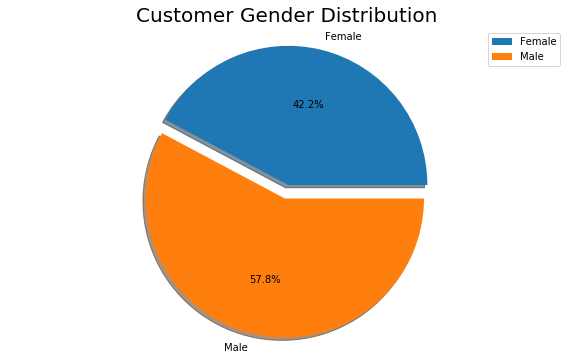

In [29]:
genderCount = df.groupby('Gender')['Count'].sum()

plt.figure(figsize=(10,6))
plt.title("Customer Gender Distribution", fontsize=20)
plt.pie(genderCount, explode=(0.1,0), labels=genderCount.index, autopct='%1.1f%%', shadow=True)
plt.legend()
plt.axis('equal')

plt.show()

,Fitness,Usage
Fitness,1.000000,0.552147
Usage,0.552147,1.000000


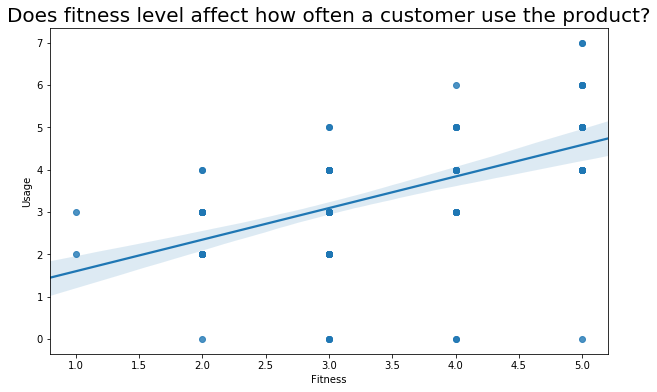

In [30]:
fig, ex1 = plt.subplots(figsize=(10,6))

ex1 = sns.regplot(x='Fitness', y='Usage', data=df)
ex1.set_title("Does fitness level affect how often a customer use the product?", fontsize=20)
fitnessUsage_corr = df[['Fitness','Usage']]
fitnessUsage_corr.corr()

,Age,Usage
Age,1.000000,0.057552
Usage,0.057552,1.000000


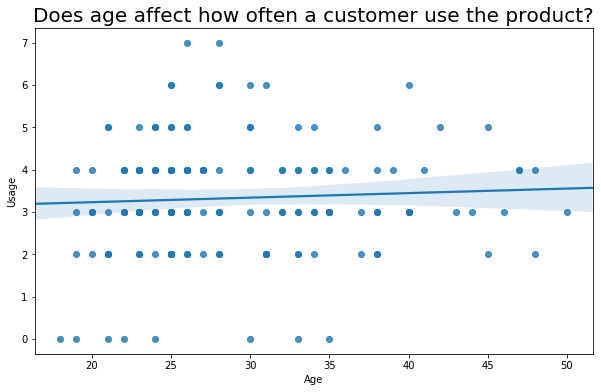

In [31]:
fig, ex2 = plt.subplots(figsize=(10,6))

ex2 = sns.regplot(x='Age', y='Usage', data=df)
ex2.set_title("Does age affect how often a customer use the product?", fontsize=20)

ageUsage_corr = df[['Age','Usage']]
ageUsage_corr.corr()

,Education,Income
Education,1.000000,0.625827
Income,0.625827,1.000000


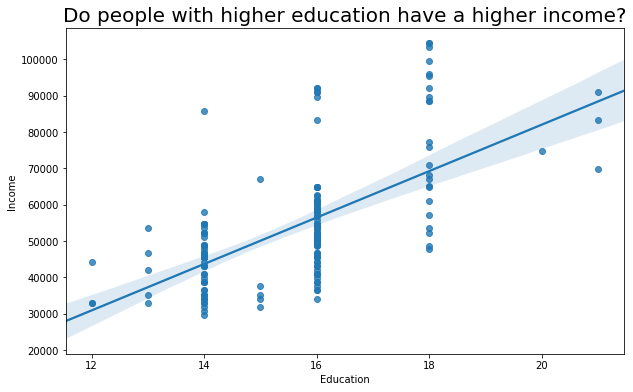

In [32]:
fig, ex3 = plt.subplots(figsize=(10,6))

ex3 = sns.regplot(x='Education', y='Income', data=df)
ex3.set_title("Do people with higher education have a higher income?", fontsize=20)

educationIncome_corr = df[['Education','Income']]
educationIncome_corr.corr()

Text(0, 0.5, 'Count')

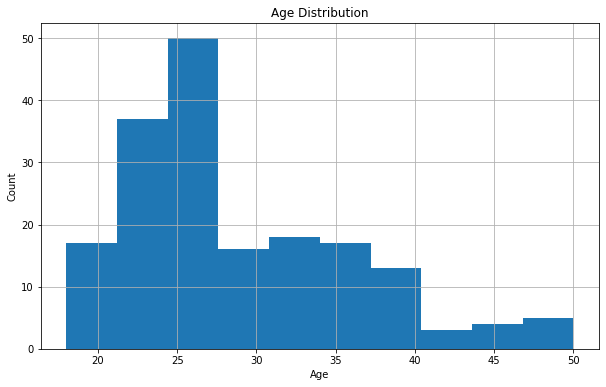

In [33]:
fig, ex4 = plt.subplots(figsize=(10,6))
ex4 = df.Age.hist()
ex4.set_title("Age Distribution")
ex4.set_xlabel("Age")
ex4.set_ylabel("Count")

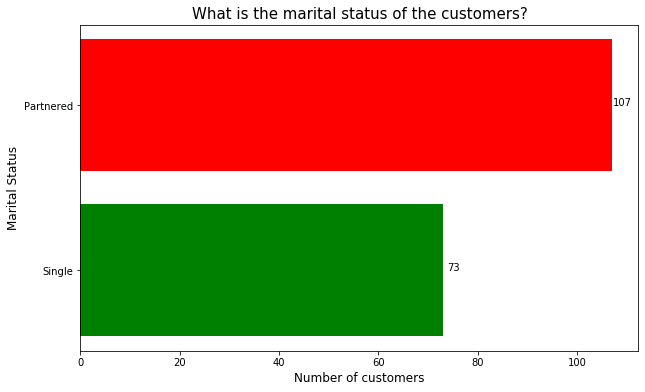

In [34]:
maritalStatus = df.MaritalStatus.value_counts()
maritalStatus.sort_values(ascending=True, inplace=True)

x = maritalStatus.index
y = maritalStatus

fig, ex5 = plt.subplots(figsize=(10,6))
ex5.barh(x, y, align='center', color=('g', 'r')) # align define the alignment of x-ticks
# State title of plot and the axes labels
ex5.set_title('What is the marital status of the customers?', fontsize=15)
ex5.set_ylabel('Marital Status', fontsize=12)
ex5.set_xlabel('Number of customers', fontsize=12)

# Set ranges for the x-axis and y-axis

# Display data labels
for x,y in zip(x ,y):

    label = y

    ex5.annotate(label, # this is the text
                 (y,x), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Display the plot 
plt.show()

Text(0, 0.5, 'Count')

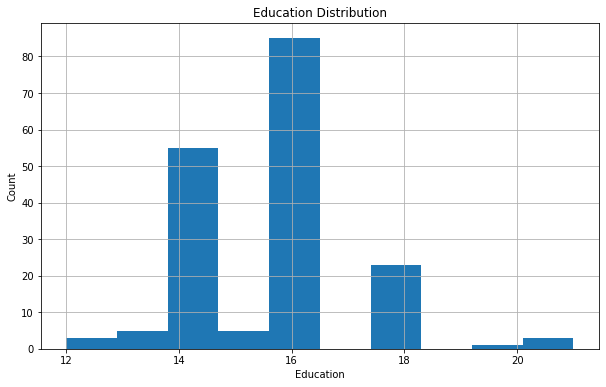

In [35]:
fig, ex6 = plt.subplots(figsize=(10,6))
ex6 = df.Education.hist()
ex6.set_title("Education Distribution")
ex6.set_xlabel("Education")
ex6.set_ylabel("Count")

,Fitness,Miles
Fitness,1.000000,0.785702
Miles,0.785702,1.000000


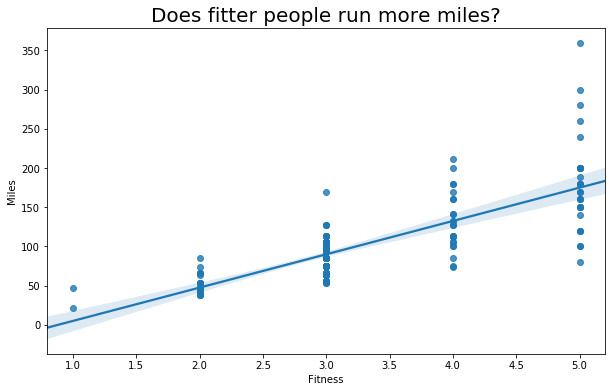

In [36]:
fig, ex7 = plt.subplots(figsize=(10,6))

ex7 = sns.regplot(x='Fitness', y='Miles', data=df)
ex7.set_title("Does fitter people run more miles?", fontsize=20)
fitnessUsage_corr = df[['Fitness','Miles']]
fitnessUsage_corr.corr()

### 2.2 Visualizations for Psychographic Segmentation


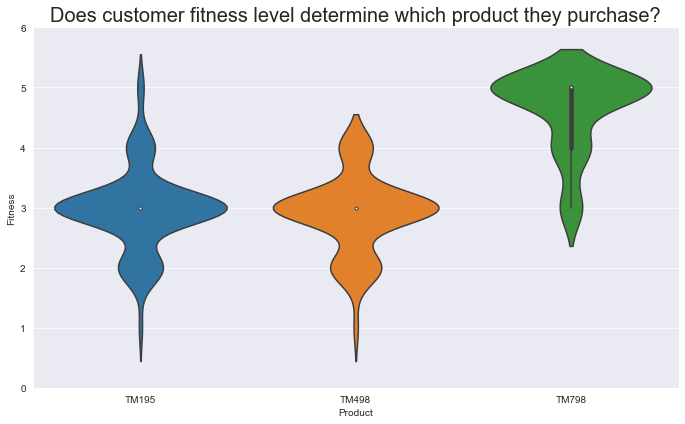

In [37]:
sns.set_style('darkgrid')
fig, ax1 = plt.subplots(nrows=1,ncols=1, figsize=(10,6))

def plotCustomerFitness():  
    sns.violinplot(x='Product', y='Fitness', data=df, ax=ax1)
    ax1.set_ylim(bottom=0, top=6)
    ax1.set_title('Does customer fitness level determine which product they purchase?', fontsize=20)
    
plotCustomerFitness()
fig.tight_layout()
plt.show()

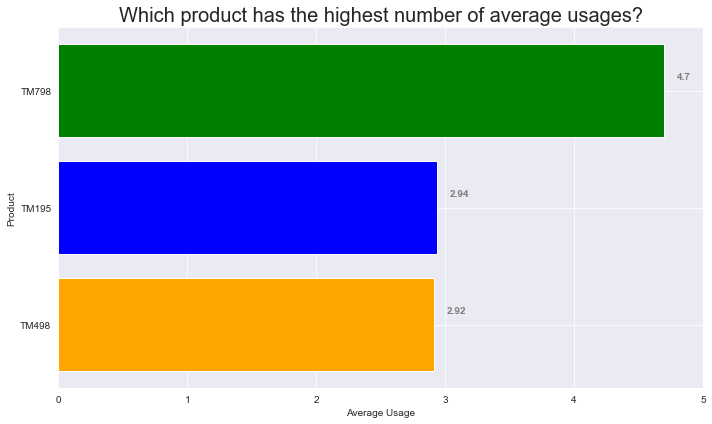

In [38]:
productUsage = df.groupby('Product')['Usage'].mean()
productUsage.sort_values(ascending=True, inplace=True)      

fig, ax2 = plt.subplots(nrows=1,ncols=1, figsize=(10,6))

def plotProductUsage():
    
    ax2.barh(productUsage.index, productUsage, align='center', color=['orange', 'blue', 'green']) 

    ax2.set_title('Which product has the highest number of average usages?', fontsize=20)
    ax2.set_ylabel('Product')
    ax2.set_xlabel('Average Usage')
    ax2.set_xlim(right=5)
    
    for i in ax2.patches: 
        ax2.text(i.get_width()+0.1, i.get_y()+0.5,  
                 str(round((i.get_width()), 2)), 
                 fontsize = 10, fontweight ='bold', 
                 color ='grey') 
                

plotProductUsage()
fig.tight_layout()
# Display the plot 
plt.show()

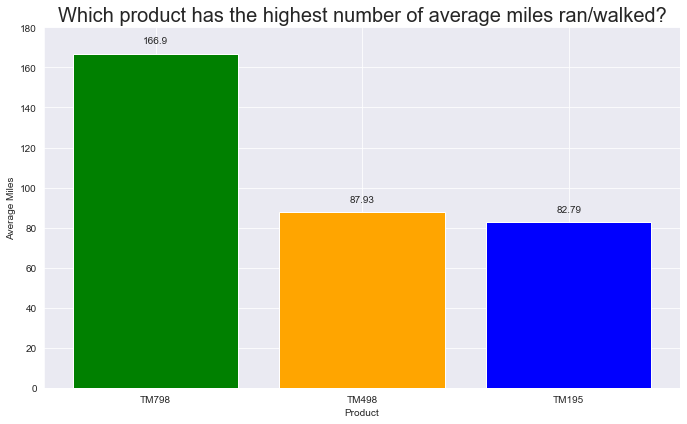

In [39]:
productMiles = df.groupby('Product')['Miles'].mean()
productMiles.sort_values(ascending=False, inplace=True)

fig, ax3 = plt.subplots(nrows=1,ncols=1, figsize=(10,6))
    
def plotProductMiles():
    
    ax3.bar(productMiles.index, productMiles, align='center', color=['green', 'orange', 'blue']) 

    # State title of plot and the axes labels
    ax3.set_title('Which product has the highest number of average miles ran/walked?', fontsize=20)
    ax3.set_ylabel('Average Miles')
    ax3.set_xlabel('Product')
    ax3.set_ylim(top=180)
    
    # Display data labels
    for x,y in zip(productMiles.index, productMiles):

        label = round(y,2)

        ax3.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

plotProductMiles()
plt.tight_layout()
# Display the plot 
plt.show()

### 2.3 Visualizations for Demographic Segmentation


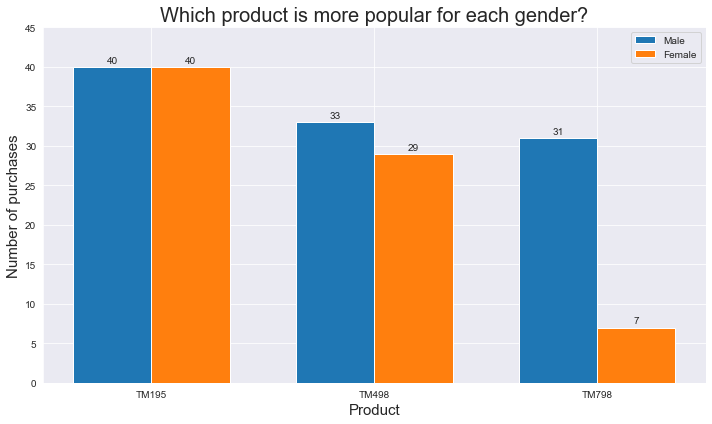

In [40]:
product = df.Product.unique()
product.sort()

genderProduct = df.groupby('Gender')['Product'].value_counts()
genderProduct.sort_index()

# Create a function to display data labels/annotations for each bar
def autolabel1(bars):
    for each in bars:
        height = each.get_height()
        ax4.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

fig, ax4 = plt.subplots(figsize=(10,6))

def plotGenderProduct():

    x_labels = product
    men_total = genderProduct['Male']
    women_total = genderProduct['Female']

    x = np.arange(len(x_labels))  
    width = 0.35

    # Plot side-by-side bars
    bar1 = ax4.bar(x - width/2, men_total, width, label='Male')
    bar2 = ax4.bar(x + width/2, women_total, width, label='Female')

    # Customise the plot
    ax4.set_title('Which product is more popular for each gender?', fontsize = 20)
    ax4.set_ylabel('Number of purchases', fontsize = 15)
    ax4.set_xlabel('Product', fontsize=15)
    ax4.set_xticks(x)
    ax4.set_xticklabels(x_labels)
    ax4.set_ylim(bottom = 0, top = 45)
    ax4.legend()

    # Use function to display data labels for both bars
    autolabel1(bar1)
    autolabel1(bar2)


plotGenderProduct()
# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()


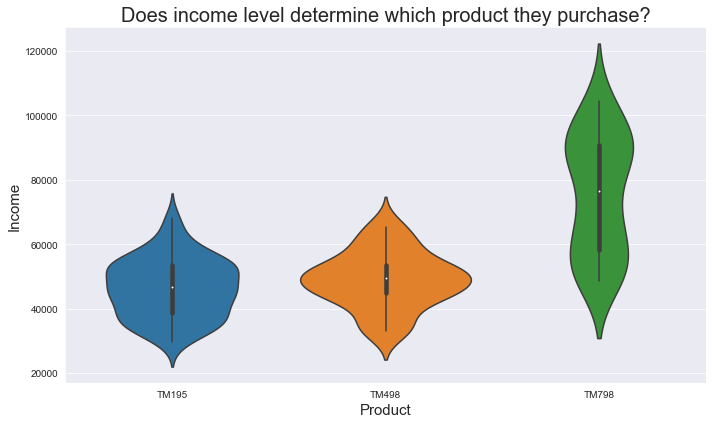

In [41]:
fig, ax5 = plt.subplots(nrows=1,ncols=1, figsize=(10,6))
def plotProductIncome():   
    sns.violinplot(x='Product', y='Income', data=df, ax=ax5)
    ax5.set_title('Does income level determine which product they purchase?', fontsize=20)
    ax5.set_ylabel("Income", fontsize=15)
    ax5.set_xlabel("Product", fontsize=15)

plotProductIncome()
fig.tight_layout()
plt.show()

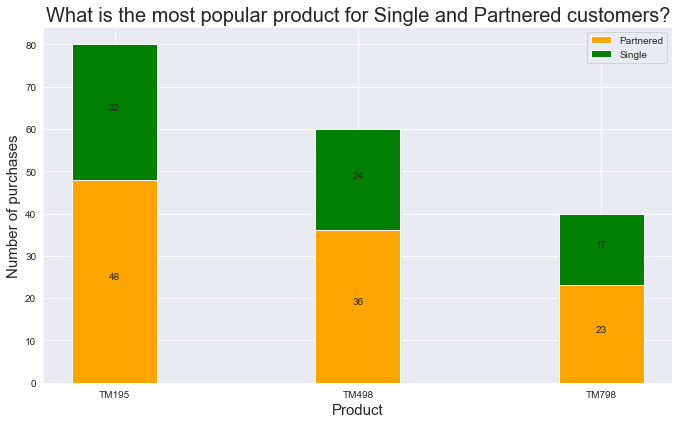

In [42]:
married = df[df['MaritalStatus'] == 'Partnered'].groupby('Product')['Count'].sum()
single = df[df['MaritalStatus'] == 'Single'].groupby('Product')['Count'].sum()

married.sort_index()
single.sort_index()


fig, ax6 = plt.subplots(figsize=(10,6))

def plotMaritalProduct():

    x_labels = product
    # Set the width of the bars
    width = 0.35 

    # Plot stacked bars
    ax6.bar(x_labels, married, width, label='Partnered', color = 'orange')
    ax6.bar(x_labels, single, width, bottom=married, label='Single', color = 'green')

    # Set title, y-axis label and show legend
    ax6.set_title('What is the most popular product for Single and Partnered customers?', fontsize = 20)
    ax6.set_ylabel('Number of purchases', fontsize = 15)
    ax6.set_xlabel('Product', fontsize = 15)
    ax6.legend()

    for rec in ax6.patches:
        height = rec.get_height()
        ax6.text(rec.get_x() + rec.get_width() / 2, 
                  rec.get_y() + height / 2,
                  "{:.0f}".format(height),
                  ha='center', 
                 va='bottom')
        
plotMaritalProduct()

# Set tight layout for figure
fig.tight_layout()

# Display the plot
plt.show()

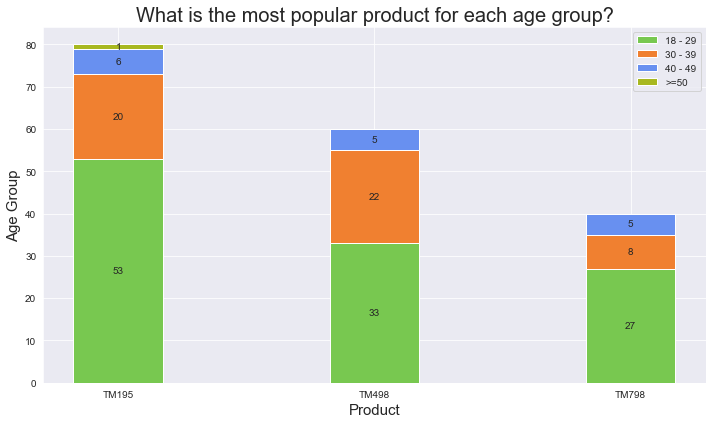

In [43]:
ageGroup0 = df[df['AgeGroup'] == 0].groupby('Product')['Count'].sum()
ageGroup1 = df[df['AgeGroup'] == 1].groupby('Product')['Count'].sum()
ageGroup2 = df[df['AgeGroup'] == 2].groupby('Product')['Count'].sum()
ageGroup3 = df[df['AgeGroup'] == 3].groupby('Product')['Count'].sum()

ageGroup0.sort_index()
ageGroup1.sort_index()
ageGroup2.sort_index()
ageGroup3.sort_index()

#check if  all 3 products exist in the age group. otherwise its 0.
#this is done to prevent errors from occuring
def checkColumnExist(ageGroup):
    for i in ageGroup:
        
        if('TM195' not in ageGroup):
            ageGroup['TM195'] = 0
        if('TM498' not in ageGroup):
            ageGroup['TM498'] = 0
        if('TM798' not in ageGroup):
            ageGroup['TM798'] = 0
            
checkColumnExist(ageGroup0)
checkColumnExist(ageGroup1)
checkColumnExist(ageGroup2)
checkColumnExist(ageGroup3)

# Create a figure and subplot (default is 1 row by 1 col)
fig, ax7 = plt.subplots(figsize=(10,6)) # both "ax" and "axes" are commonly adopted


def plotAgeProduct():
        
    x_labels = product
    # Set the width of the bars
    width = 0.35


    # Plot stacked bars
    ax7.bar(x_labels, ageGroup0, width, label='18 - 29', color = '#78C850')

    ax7.bar(x_labels, ageGroup1, width, bottom=ageGroup0, label='30 - 39', color = '#F08030')

    ax7.bar(x_labels, ageGroup2, width, bottom=ageGroup0+ageGroup1, label='40 - 49', color = '#6890F0')

    ax7.bar(x_labels, ageGroup3, width, bottom=ageGroup0+ageGroup1+ageGroup2, label='>=50', color = '#A8B820')


    # Set title, y-axis label and show legend
    ax7.set_title('What is the most popular product for each age group?', fontsize = 20)
    ax7.set_ylabel('Age Group', fontsize = 15)
    ax7.set_xlabel('Product', fontsize=15)
    ax7.legend()

    for p in ax7.patches:
        if(p.get_height() > 0):  #ensure that there is value for the bar, otherwise dont display
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax7.text(x+width/2, 
                    y+height/2, 
                    '{:.0f}'.format(height), 
                    horizontalalignment='center', 
                    verticalalignment='center')

plotAgeProduct()
fig.tight_layout()
# Display the plot
plt.show()

### 2.4 Visualizations for Geographic Segmentation

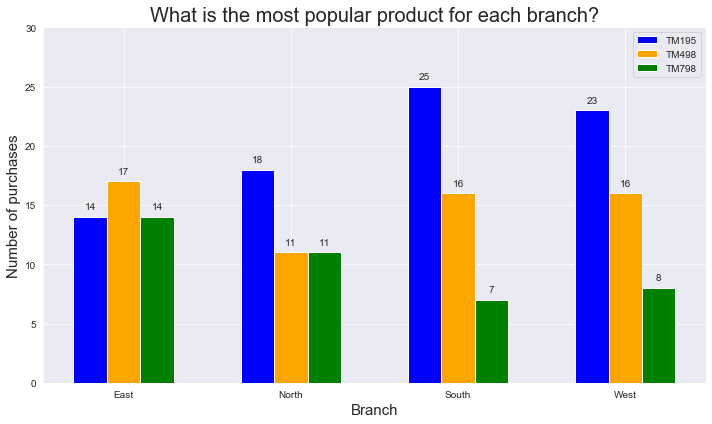

In [44]:
branch = df.Branch.unique()
branch.sort()

productBranch = df.groupby('Product')['Branch'].value_counts() 
productBranch = productBranch.sort_index() #sort it according to the index so that the product name matches branch

x_labels = branch
TM195 = productBranch['TM195']
TM498 = productBranch['TM498']
TM798 = productBranch['TM798']

fig, ax8 = plt.subplots(figsize=(10,6))

def plotBranchProduct():

    x = np.arange(len(x_labels))  
    barWidth = 0.20

    r1 = np.arange(len(TM195))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]

    # Plot side-by-side bars
    bar1 = ax8.bar(r1, TM195, barWidth, label='TM195', color='blue')
    bar2 = ax8.bar(r2, TM498, barWidth, label='TM498', color='orange')
    bar3 = ax8.bar(r3, TM798, barWidth, label='TM798', color='green')

    # Customise the plot
    ax8.set_title('What is the most popular product for each branch?', fontsize = 20)
    ax8.set_ylabel('Number of purchases', fontsize = 15)
    ax8.set_xlabel('Branch', fontsize=15)

    ax8.set_xticks([r + barWidth for r in range(len(bar1))])
    ax8.set_xticklabels(x_labels)
    ax8.set_ylim(bottom = 0, top = 30)
    ax8.legend()

    for p in ax8.patches:
        ax8.annotate(f'{p.get_height():0}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        
plotBranchProduct()
# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()


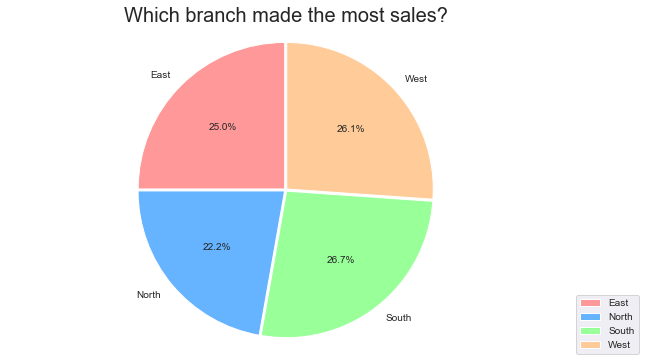

In [45]:
totalProducts = df.groupby('Branch')['Count'].sum()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig, ax9 = plt.subplots(nrows=1,ncols=1, figsize=(10,6))

def plotBranchTotalProducts():
    
    ax9.pie(totalProducts, labels=totalProducts.index, autopct='%1.1f%%', 
            startangle=90,  explode=(0.01,0.01,0.01,0.01),
            colors=colors)
    
    ax9.set_title("Which branch made the most sales?", fontsize=20) 
    ax9.legend(loc=(1.02,0))
    ax9.axis('equal')

plotBranchTotalProducts()

plt.show()

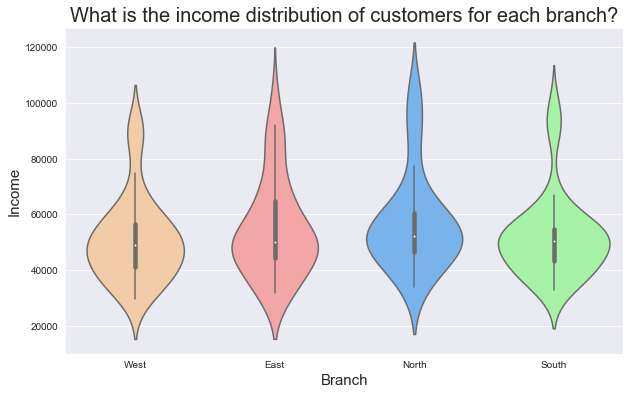

In [46]:
colors = ['#ffcc99', '#ff9999', '#66b3ff', '#99ff99']
fig, ax10 = plt.subplots(nrows=1,ncols=1, figsize=(10,6))

def plotBranchIncome():

    sns.violinplot(x='Branch', y='Income', data=df, palette=colors, ax=ax10)
    ax10.set_title('What is the income distribution of customers for each branch?', fontsize=20)
    ax10.set_xlabel("Branch", fontsize=15)
    ax10.set_ylabel("Income", fontsize=15)
    
plotBranchIncome()

plt.show()

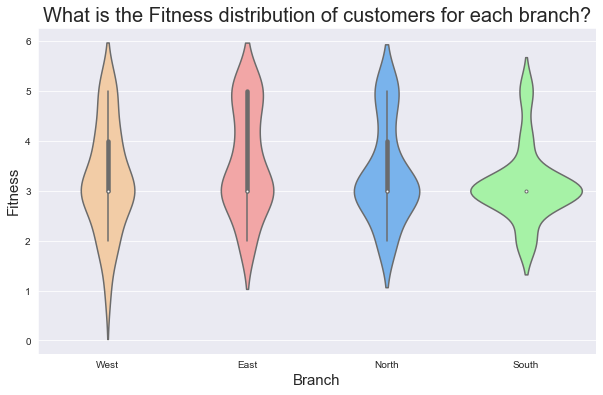

In [47]:
colors = ['#ffcc99', '#ff9999', '#66b3ff', '#99ff99']
fig, ax11 = plt.subplots(nrows=1,ncols=1, figsize=(10,6))

def plotBranchFitness():
    
    sns.violinplot(x='Branch', y='Fitness', data=df, palette=colors, ax=ax11)
    ax11.set_title('What is the Fitness distribution of customers for each branch?', fontsize=20)
    ax11.set_xlabel("Branch", fontsize=15)
    ax11.set_ylabel("Fitness", fontsize=15)
    
plotBranchFitness()
plt.show()

## 3. Dashboards

### 3.1 Psychographic Segmentation Dashboard

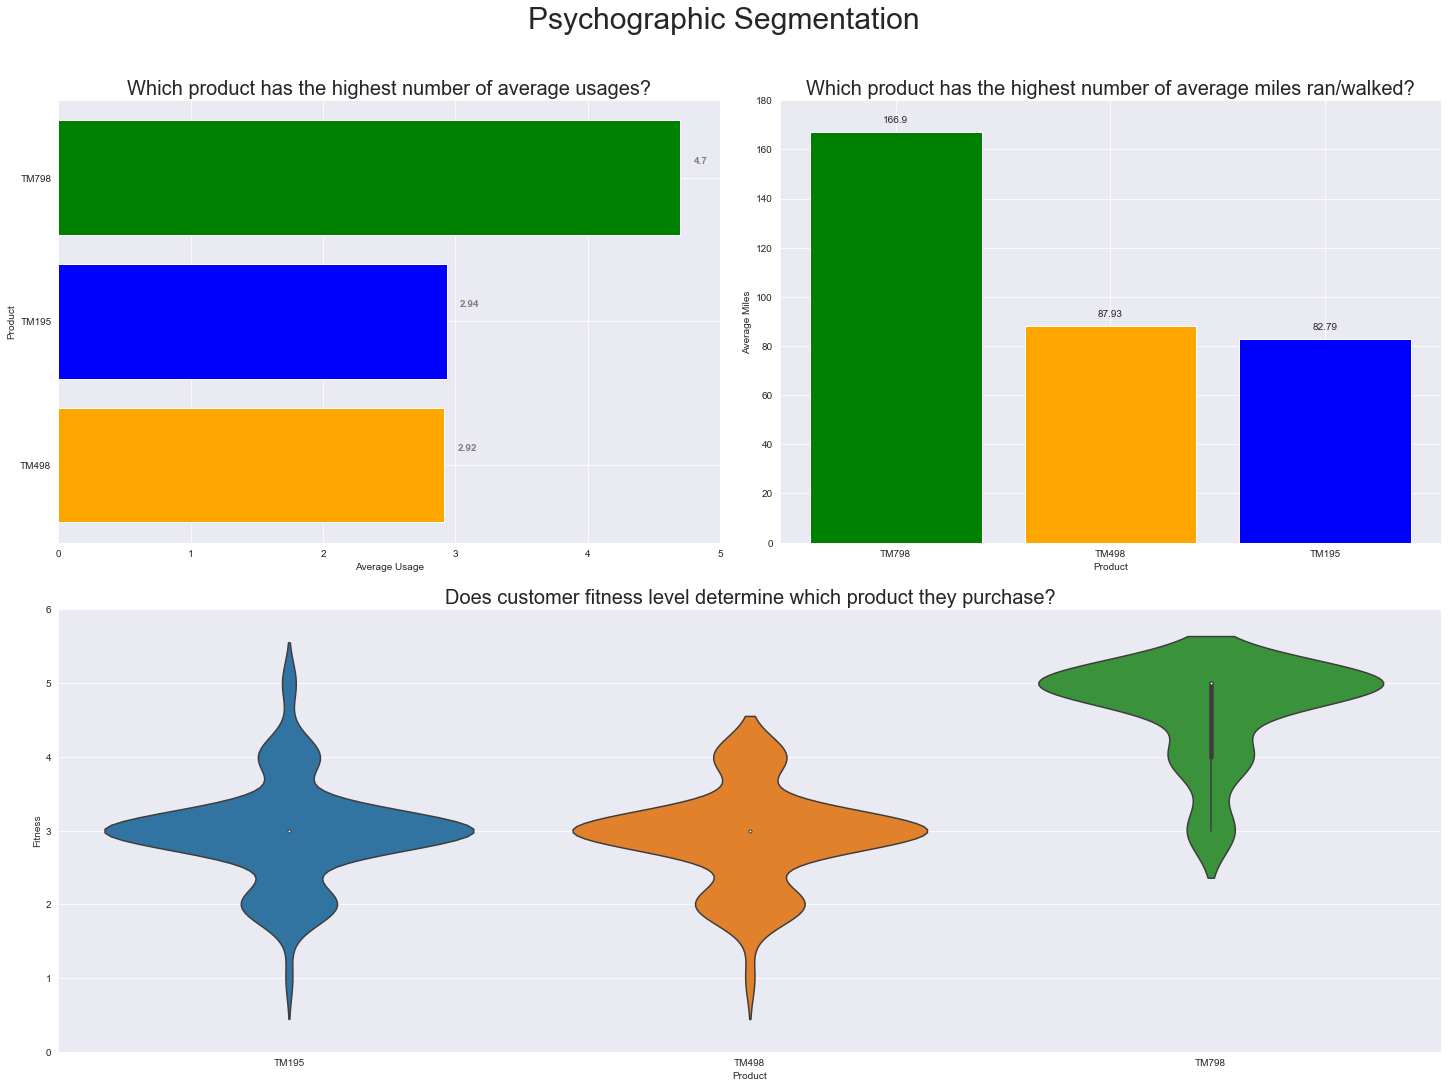

In [48]:
# Enter your code here:
fig = plt.figure(figsize=(20,15), constrained_layout=True)
gs = GridSpec(nrows=2, ncols=2, figure=fig)

ax1 = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[0, :-1])
ax3 = fig.add_subplot(gs[0, -1])

plotCustomerFitness()
plotProductUsage()
plotProductMiles()
fig.suptitle("Psychographic Segmentation\n", fontsize=30)

plt.show()


### 3.2 Demographic Segmentation Dashboard

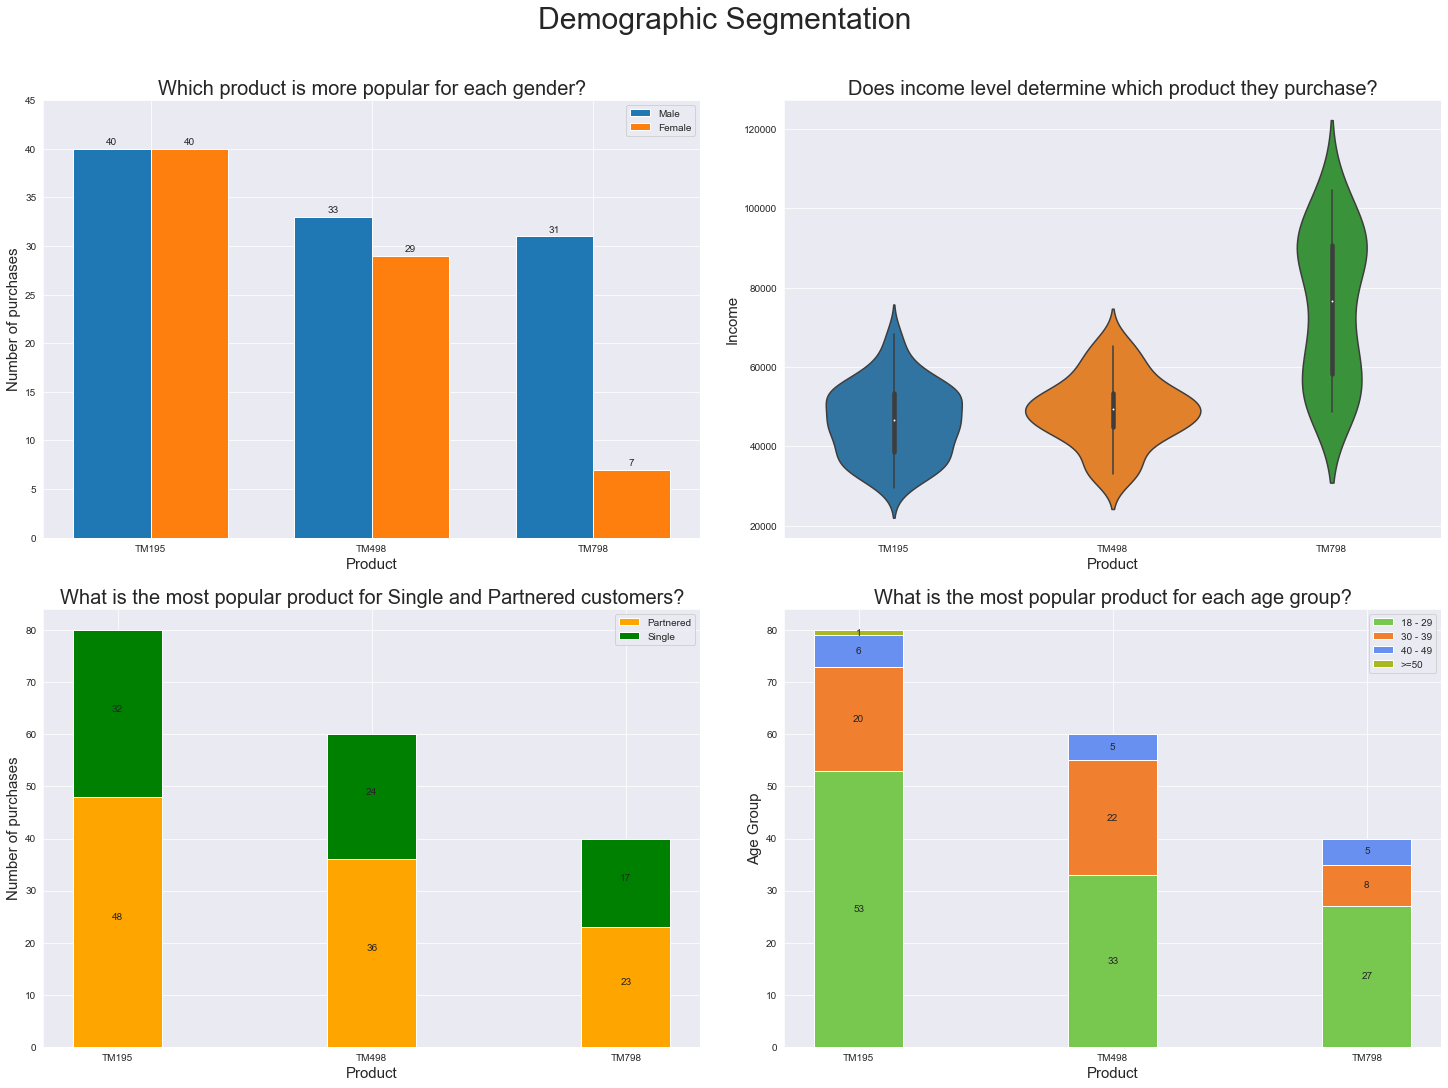

In [49]:
# Enter your code here:
fig = plt.figure(figsize=(20,15), constrained_layout=True)
gs = GridSpec(nrows=2, ncols=2, figure=fig)

ax4 = fig.add_subplot(gs[0, 0])
ax5 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 0])
ax7 = fig.add_subplot(gs[1, 1])
plotGenderProduct()
plotProductIncome()
plotMaritalProduct()
plotAgeProduct()

fig.suptitle("Demographic Segmentation\n", fontsize=30)

plt.show()


### 3.3 Geographic Segmentation Dashboard

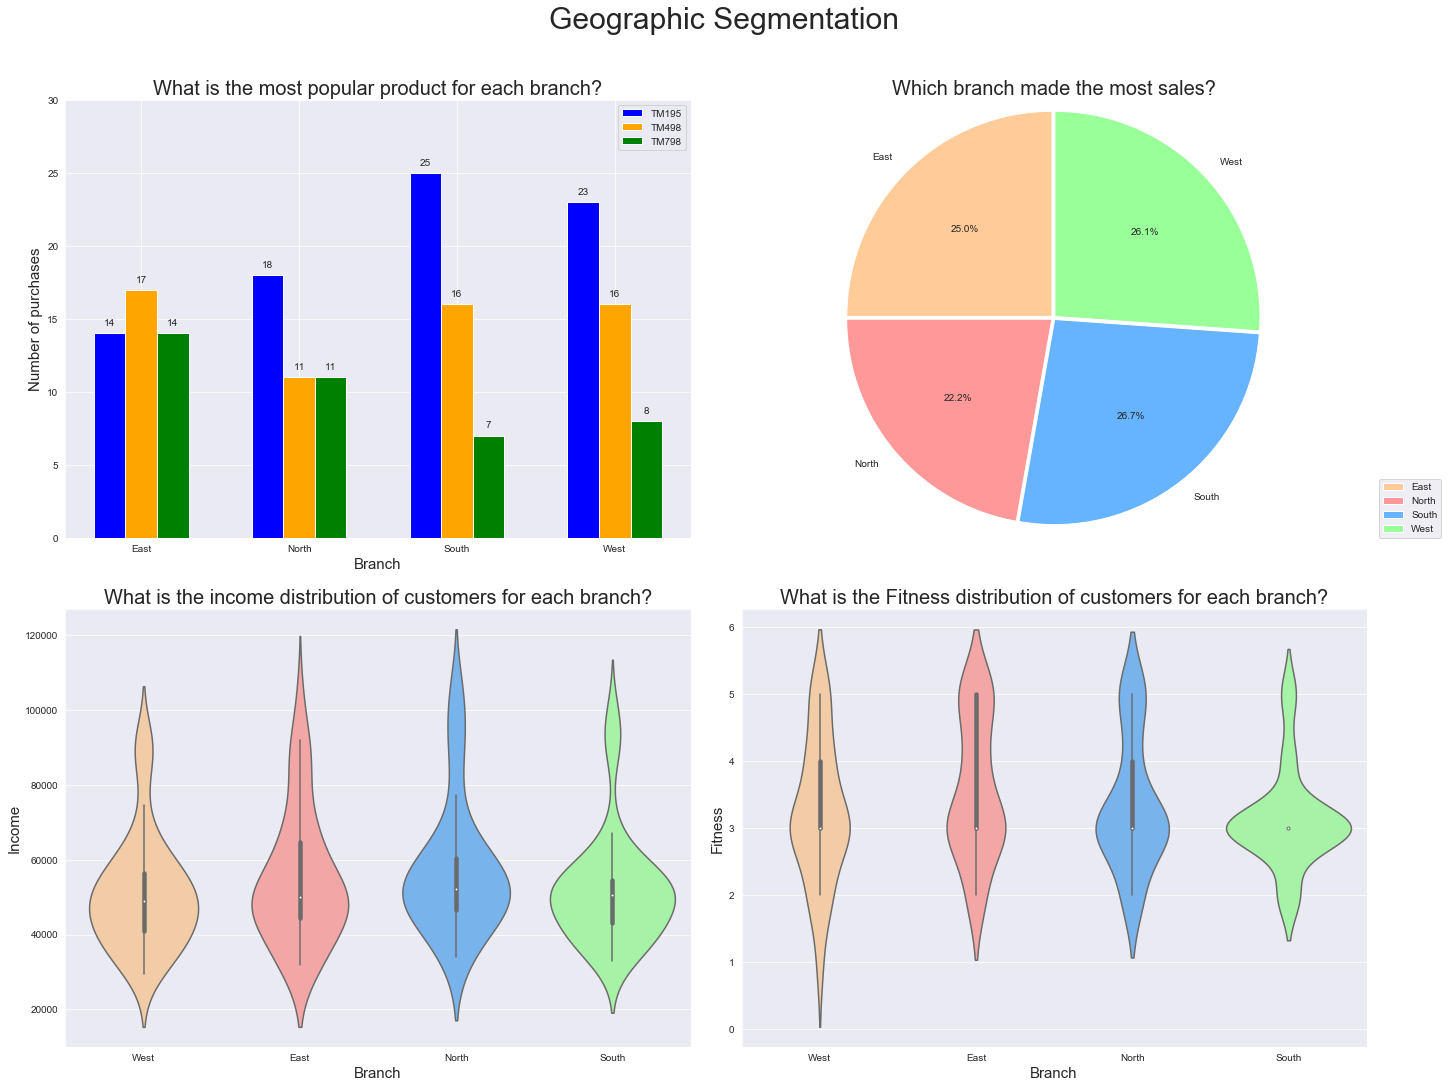

In [50]:
# Enter your code here:
fig = plt.figure(figsize=(20,15), constrained_layout=True)
gs = GridSpec(nrows=2, ncols=2, figure=fig)

ax8 = fig.add_subplot(gs[0, 0])
ax9 = fig.add_subplot(gs[0, 1])
ax10 = fig.add_subplot(gs[1, 0])
ax11 = fig.add_subplot(gs[1, 1])

plotBranchProduct()
plotBranchTotalProducts()
plotBranchIncome()
plotBranchFitness()
fig.suptitle("Geographic Segmentation\n", fontsize=30)

plt.show()
